In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [7]:
totalNa = data.isna().sum()
for key, val in totalNa.items():
    if val != 0:
        print(key, "has ", val, " Null values ({} %)".format(round(val / len(data), 2)*100))

Description has  1454  Null values (0.0 %)
CustomerID has  135080  Null values (25.0 %)


In [8]:
def divideAttributes(df):
    # Separating Numerical and Categorical Attributes
    dfNum = df.select_dtypes(include=np.number)
    dfCat = df.select_dtypes(exclude=np.number)
    return dfNum, dfCat

dfNum, dfCat = divideAttributes(data)

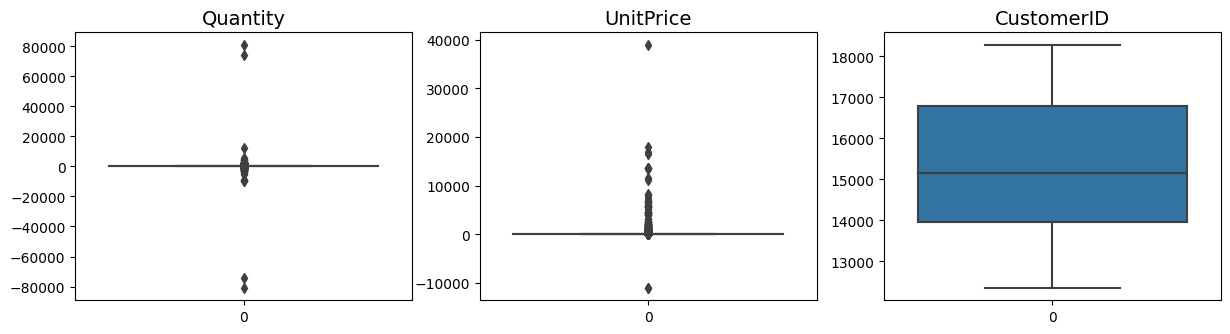

In [9]:
plt.figure(figsize=(20,16))
for idx, feature in enumerate(dfNum.columns):
    plt.subplot(4, 4, idx + 1)
    sns.boxplot(data[feature])
    plt.title(feature)

In [10]:
dfNum.columns

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

<Axes: >

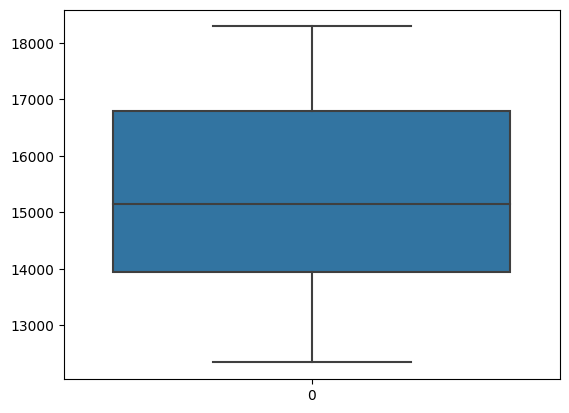

In [11]:
sns.boxplot(dfNum['CustomerID'])

<Axes: >

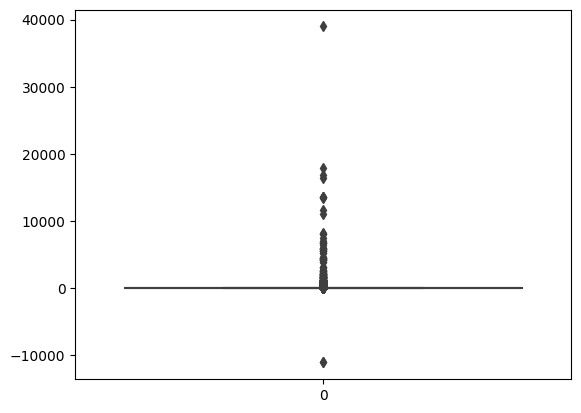

In [12]:
sns.boxplot(dfNum['UnitPrice'])

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

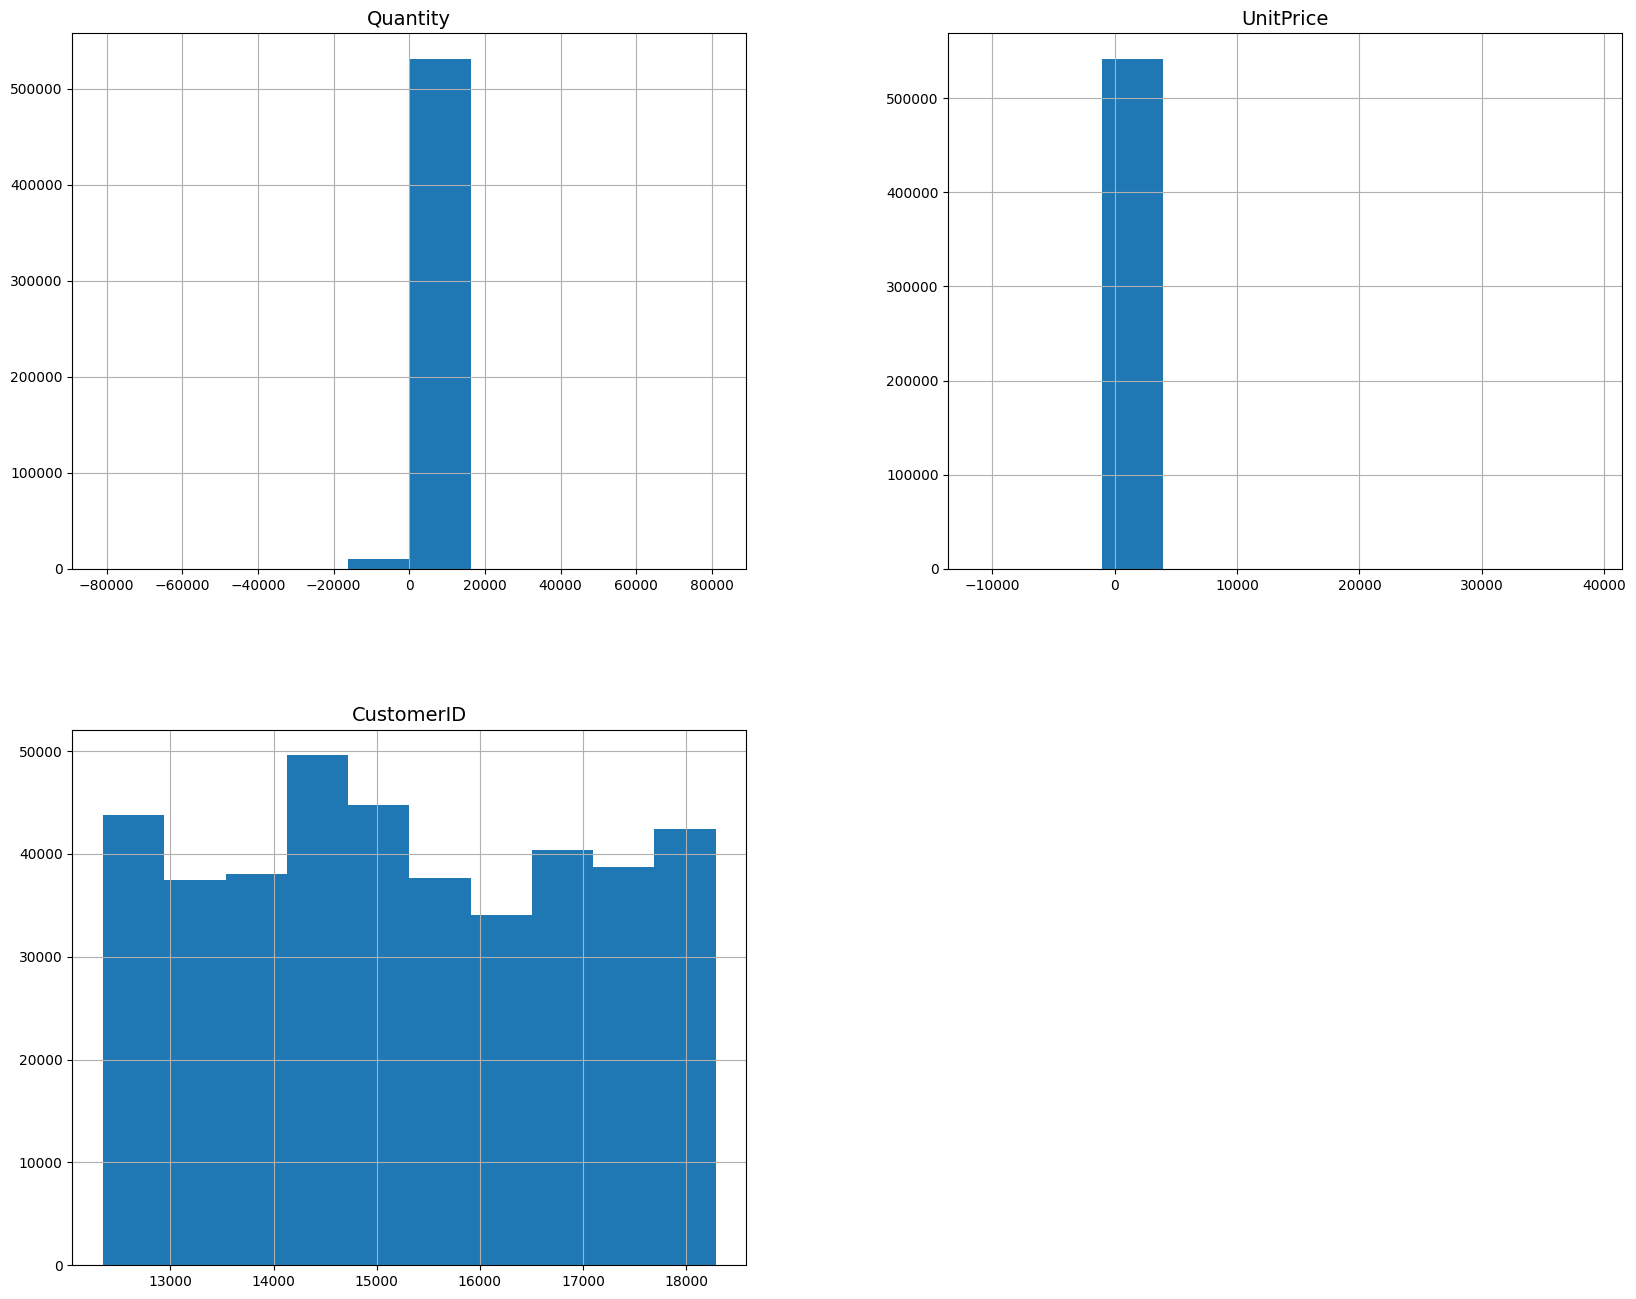

In [13]:
dfNum.hist(figsize=(20,16))

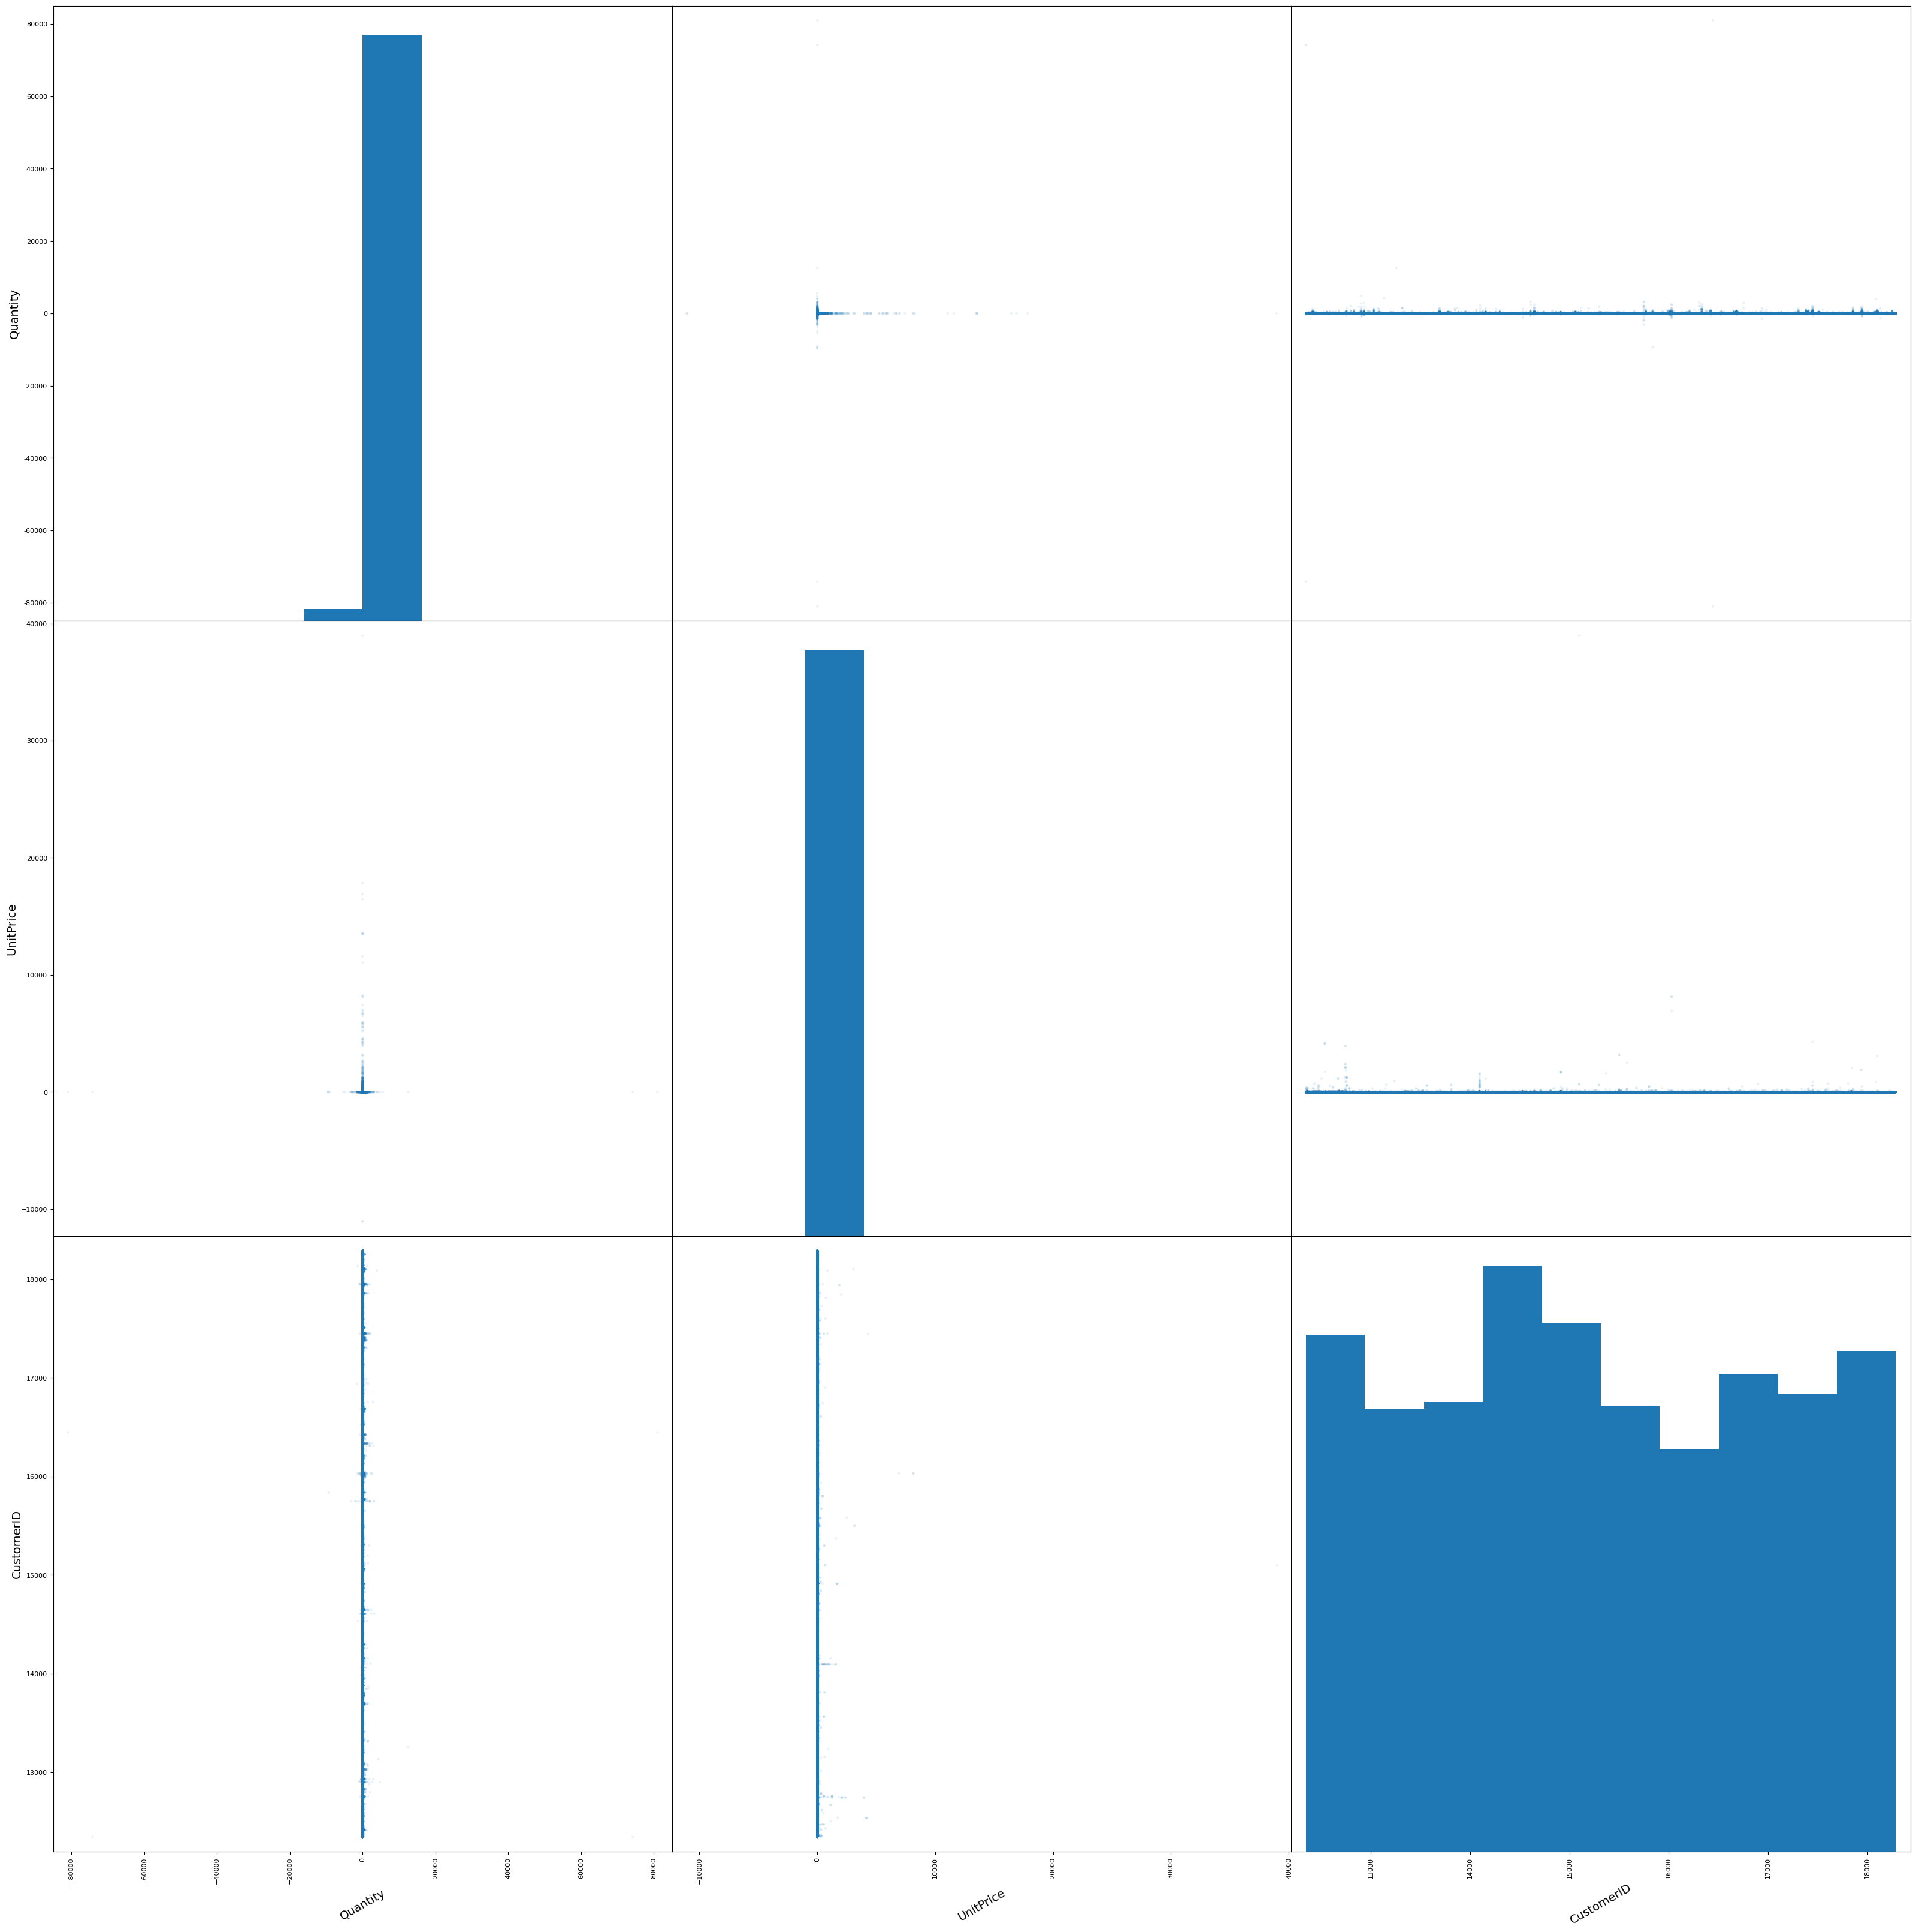

In [14]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(dfNum, figsize=(40,40), alpha=0.1)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(30)

In [ ]:
plt.figure(figsize=(32,32))
for idx, attr in enumerate(dfCat.columns):
    if idx <= 18:
        plt.subplot(8,3, idx + 1)
        sns.countplot(data=dfCat, x=attr, label='Count')
plt.show()

In [19]:
data['Description'].value_counts().nlargest(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
Name: count, dtype: int64

In [29]:
new = data['Description'].value_counts().nlargest(20)

<Axes: ylabel='Description'>

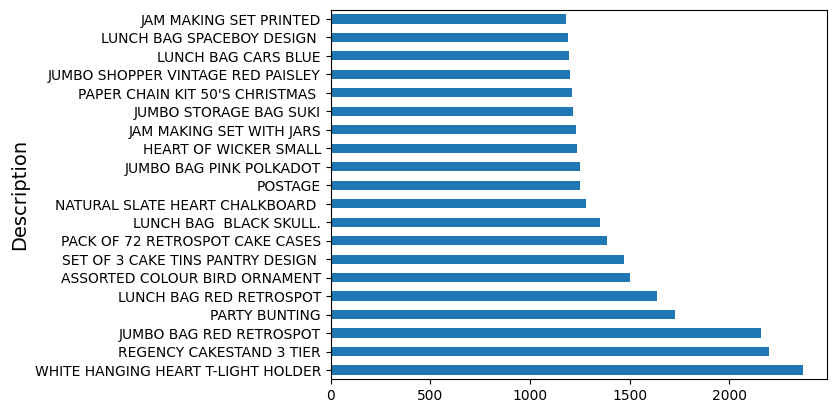

In [32]:
data['Description'].value_counts()[:20].plot(kind='barh')